In [1]:
#conda install -c conda-forge shap

In [1]:
from loaders.Loaders import CSVLoader
from compoundFeaturization.rdkitFingerprints import MorganFingerprint, MACCSkeysFingerprint
from splitters.splitters import SingletaskStratifiedSplitter
from metrics.Metrics import Metric
from metrics.metricsFunctions import r2_score, roc_auc_score, precision_score, accuracy_score, confusion_matrix, classification_report, f1_score

from sklearn.ensemble import RandomForestClassifier

from featureSelection.baseFeatureSelector import LowVarianceFS

from models.sklearnModels import SklearnModel

from featureImportance.shapValues import ShapValues

In [3]:
#Load Dataset
dataset = CSVLoader(dataset_path='data/dataset_last_version2.csv', 
                    mols_field='Smiles', 
                    labels_fields='Class')#, shard_size=4000)
dataset = dataset.create_dataset(sep=';')
dataset.get_shape()

Mols_shape:  2344
Features_shape:  X not defined!
Labels_shape:  (2344,)


In [4]:
#Featurization
dataset = MACCSkeysFingerprint().featurize(dataset)
dataset.get_shape()
#Feature Selection
#dataset = LowVarianceFS(0.15).featureSelection(dataset)
#dataset.get_shape()

Featurizing datapoint 0
error in smile: Clc1ccc(cc1)C[N](Cc1ccccc1)(CC(=O)Nc1c(C)cccc1C)C
error in smile: CCCC[N](Cc1ccc(cc1)Cl)(CC(=O)Nc1c(C)cccc1C)C
error in smile: BrCC[N](CC(=O)Nc1c(C)cccc1C)(C)C
error in smile: OC1=Cc2c(O)cc(O)cc2[O]=C1c3ccc(O)cc3
error in smile: CN[C@H](CC(C)C)C(=O)N[C@@H]1[C@H](O)c2ccc(Oc3cc4cc(Oc5ccc(cc5Cl)[C@@H](O)[C@@H]6NC(=O)[C@H](NC(=O)[C@@H]4NC(=O)[C@H](CC(=O)N)NC1=O)c7ccc(O)c(c7)c8c(O)cc(O)cc8[C@H](NC6=O)C(=O)O)c3O[C@@H]9O[C@H](CO)[C@@H](O)[C@H](O)[C@H]9O[C@H]%10C[C@](C)(N)[C@H](O)[C
error in smile: O=C(C[N](CCCc1ccc(cc1)Cl)(C)C)Nc1c(C)cccc1C
error in smile: ClCCCCCCCC[N](CC(=O)Nc1c(C)cccc1C)(C)C
error in smile: ClCCCCCC[N](CC(=O)Nc1c(C)cccc1C)(C)C
error in smile: CC[N](Cc1ccc(cc1)Cl)(CC(=O)Nc1c(C)cccc1C)C
error in smile: O=C(C[N](CCc1ccc(cc1)Cl)(C)C)Nc1c(C)cccc1C
error in smile: O=C(C[N](Cc1ccc(cc1)Cl)(C)C)Nc1c(C)cccc1C
error in smile: ClCCCCCCCCCC[N](CC(=O)Nc1c(C)cccc1C)(C)C


RDKit ERROR: [15:39:26] Explicit valence for atom # 8 N, 4, is greater than permitted
RDKit ERROR: [15:39:26] Explicit valence for atom # 4 N, 4, is greater than permitted
RDKit ERROR: [15:39:26] Explicit valence for atom # 3 N, 4, is greater than permitted
RDKit ERROR: [15:39:26] Explicit valence for atom # 11 O, 3, is greater than permitted
RDKit ERROR: [15:39:26] SMILES Parse Error: syntax error while parsing: CN[C@H](CC(C)C)C(=O)N[C@@H]1[C@H](O)c2ccc(Oc3cc4cc(Oc5ccc(cc5Cl)[C@@H](O)[C@@H]6NC(=O)[C@H](NC(=O)[C@@H]4NC(=O)[C@H](CC(=O)N)NC1=O)c7ccc(O)c(c7)c8c(O)cc(O)cc8[C@H](NC6=O)C(=O)O)c3O[C@@H]9O[C@H](CO)[C@@H](O)[C@H](O)[C@H]9O[C@H]%10C[C@](C)(N)[C@H](O)[C
RDKit ERROR: [15:39:26] SMILES Parse Error: Failed parsing SMILES 'CN[C@H](CC(C)C)C(=O)N[C@@H]1[C@H](O)c2ccc(Oc3cc4cc(Oc5ccc(cc5Cl)[C@@H](O)[C@@H]6NC(=O)[C@H](NC(=O)[C@@H]4NC(=O)[C@H](CC(=O)N)NC1=O)c7ccc(O)c(c7)c8c(O)cc(O)cc8[C@H](NC6=O)C(=O)O)c3O[C@@H]9O[C@H](CO)[C@@H](O)[C@H](O)[C@H]9O[C@H]%10C[C@](C)(N)[C@H](O)[C' for input: 'C

error in smile: ClCCCCC[N](CC(=O)Nc1c(C)cccc1C)(C)C
error in smile: ClC[N](CC(=O)Nc1c(C)cccc1C)(C)C
error in smile: ICCCC[N](CC(=O)Nc1c(C)cccc1C)(C)C
error in smile: CC[N](Cc1ccc(cc1)Cl)(CC(=O)Nc1c(C)cccc1C)CC
error in smile: O1[C@@H](OC2C(O[C@H](OC3C(O[C@@H](OC4CC[C@@]5([C@H](C4)CC[C@H]4[C@@H]5CC(OC(=O)C)[C@@]5(C)[C@@](O)(CC[C@]45O)C(OC(=O)C(CC)C)C)C)CC3OC)C)CC2OC)C)C(O)C(OC)C(O)


RDKit ERROR: [15:39:26] SMILES Parse Error: unclosed ring for input: 'O1[C@@H](OC2C(O[C@H](OC3C(O[C@@H](OC4CC[C@@]5([C@H](C4)CC[C@H]4[C@@H]5CC(OC(=O)C)[C@@]5(C)[C@@](O)(CC[C@]45O)C(OC(=O)C(CC)C)C)C)CC3OC)C)CC2OC)C)C(O)C(OC)C(O)'
RDKit WARNING: [15:39:27] WARNING: not removing hydrogen atom without neighbors


Featurizing datapoint 1000
error in smile: F[Si-2](F)(F)(F)(F)F.[Na+].[Na+]


RDKit ERROR: [15:39:27] Explicit valence for atom # 1 Si, 8, is greater than permitted


Featurizing datapoint 2000


RDKit WARNING: [15:39:29] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [15:39:29] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [15:39:29] WARNING: not removing hydrogen atom without neighbors


Elements with indexes:  [20, 26, 28, 32, 38, 83, 86, 87, 99, 100, 101, 103, 127, 150, 157, 158, 178, 1057]  were removed due to the presence of NAs!
The elements in question are:  ['Clc1ccc(cc1)C[N](Cc1ccccc1)(CC(=O)Nc1c(C)cccc1C)C'
 'CCCC[N](Cc1ccc(cc1)Cl)(CC(=O)Nc1c(C)cccc1C)C'
 'BrCC[N](CC(=O)Nc1c(C)cccc1C)(C)C' 'OC1=Cc2c(O)cc(O)cc2[O]=C1c3ccc(O)cc3'
 'CN[C@H](CC(C)C)C(=O)N[C@@H]1[C@H](O)c2ccc(Oc3cc4cc(Oc5ccc(cc5Cl)[C@@H](O)[C@@H]6NC(=O)[C@H](NC(=O)[C@@H]4NC(=O)[C@H](CC(=O)N)NC1=O)c7ccc(O)c(c7)c8c(O)cc(O)cc8[C@H](NC6=O)C(=O)O)c3O[C@@H]9O[C@H](CO)[C@@H](O)[C@H](O)[C@H]9O[C@H]%10C[C@](C)(N)[C@H](O)[C'
 'O=C(C[N](CCCc1ccc(cc1)Cl)(C)C)Nc1c(C)cccc1C'
 'ClCCCCCCCC[N](CC(=O)Nc1c(C)cccc1C)(C)C'
 'ClCCCCCC[N](CC(=O)Nc1c(C)cccc1C)(C)C'
 'CC[N](Cc1ccc(cc1)Cl)(CC(=O)Nc1c(C)cccc1C)C'
 'O=C(C[N](CCc1ccc(cc1)Cl)(C)C)Nc1c(C)cccc1C'
 'O=C(C[N](Cc1ccc(cc1)Cl)(C)C)Nc1c(C)cccc1C'
 'ClCCCCCCCCCC[N](CC(=O)Nc1c(C)cccc1C)(C)C'
 'ClCCCCC[N](CC(=O)Nc1c(C)cccc1C)(C)C' 'ClC[N](CC(=O)Nc1c(C)cccc1C)(C)C'
 'ICCCC

In [5]:
#Data Split
splitter = SingletaskStratifiedSplitter()
train_dataset, valid_dataset, test_dataset = splitter.train_valid_test_split(dataset=dataset, frac_train=0.7, 
                                                                             frac_valid=0.15, frac_test=0.15)

In [6]:
test_dataset.get_shape()

Mols_shape:  232
Features_shape:  (232, 167)
Labels_shape:  (232,)


In [7]:
#Scikit-Learn Random Forest
rf = RandomForestClassifier()
model = SklearnModel(model=rf)
# model training
model.fit(train_dataset)

RandomForestClassifier()

In [8]:
shap_calc = ShapValues(test_dataset, model)

Permutation explainer: 233it [03:16,  1.13it/s]                         


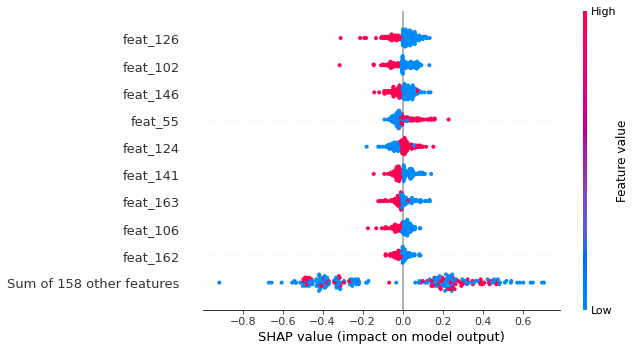

In [13]:
shap_calc.computePermutationShap()

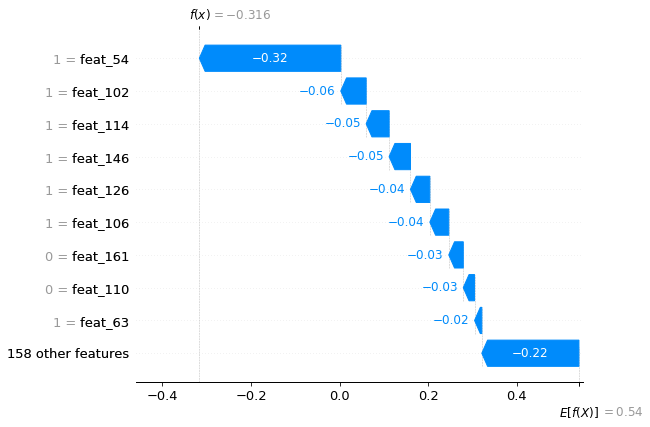

In [104]:
shap_calc.plotSampleExplanation(index=1, plot_type='waterfall')

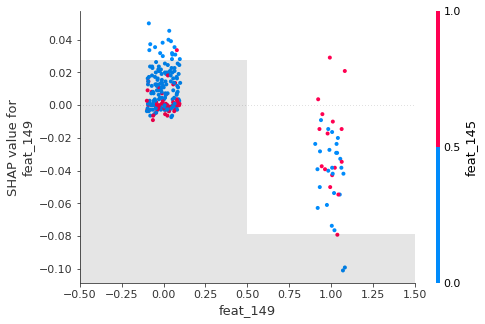

In [15]:
shap_calc.plotFeatureExplanation(index=148)

Prediction:  [0.7865 0.2135]
Actual Value:  0
Mol:  C1C(C(OC2=C1C(=CC(=C2C3C(C(OC4=CC(=CC(=C34)O)O)C5=CC(=C(C=C5)O)O)O)O)O)C6=CC(=C(C=C6)O)O)OC(=O)C7=CC(=C(C(=C7)O)O)O
Pattern:  [!#6;!#1;!H0]~*~*~[!#6;!#1;!H0]
Pattern found!


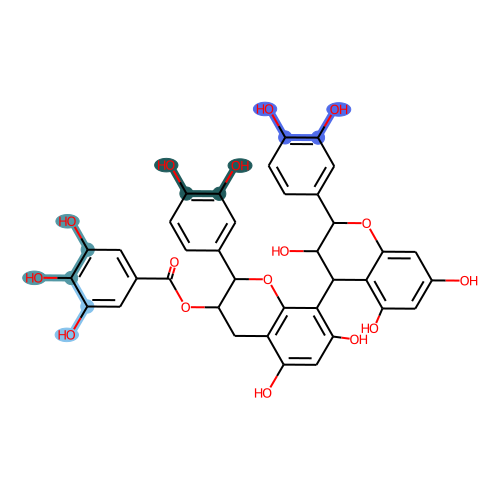

In [105]:
import utils.utils
import importlib
importlib.reload(utils.utils)
from utils.utils import draw_MACCS_Pattern

patt_number = 54
mol_number = 1

prediction = model.predict(test_dataset)[mol_number]
actual_value = test_dataset.y[mol_number]
print('Prediction: ', prediction)
print('Actual Value: ', actual_value)
smi = test_dataset.mols[mol_number]

draw_MACCS_Pattern(smi, patt_number)

Prediction:  [0.7865 0.2135]
Actual Value:  0


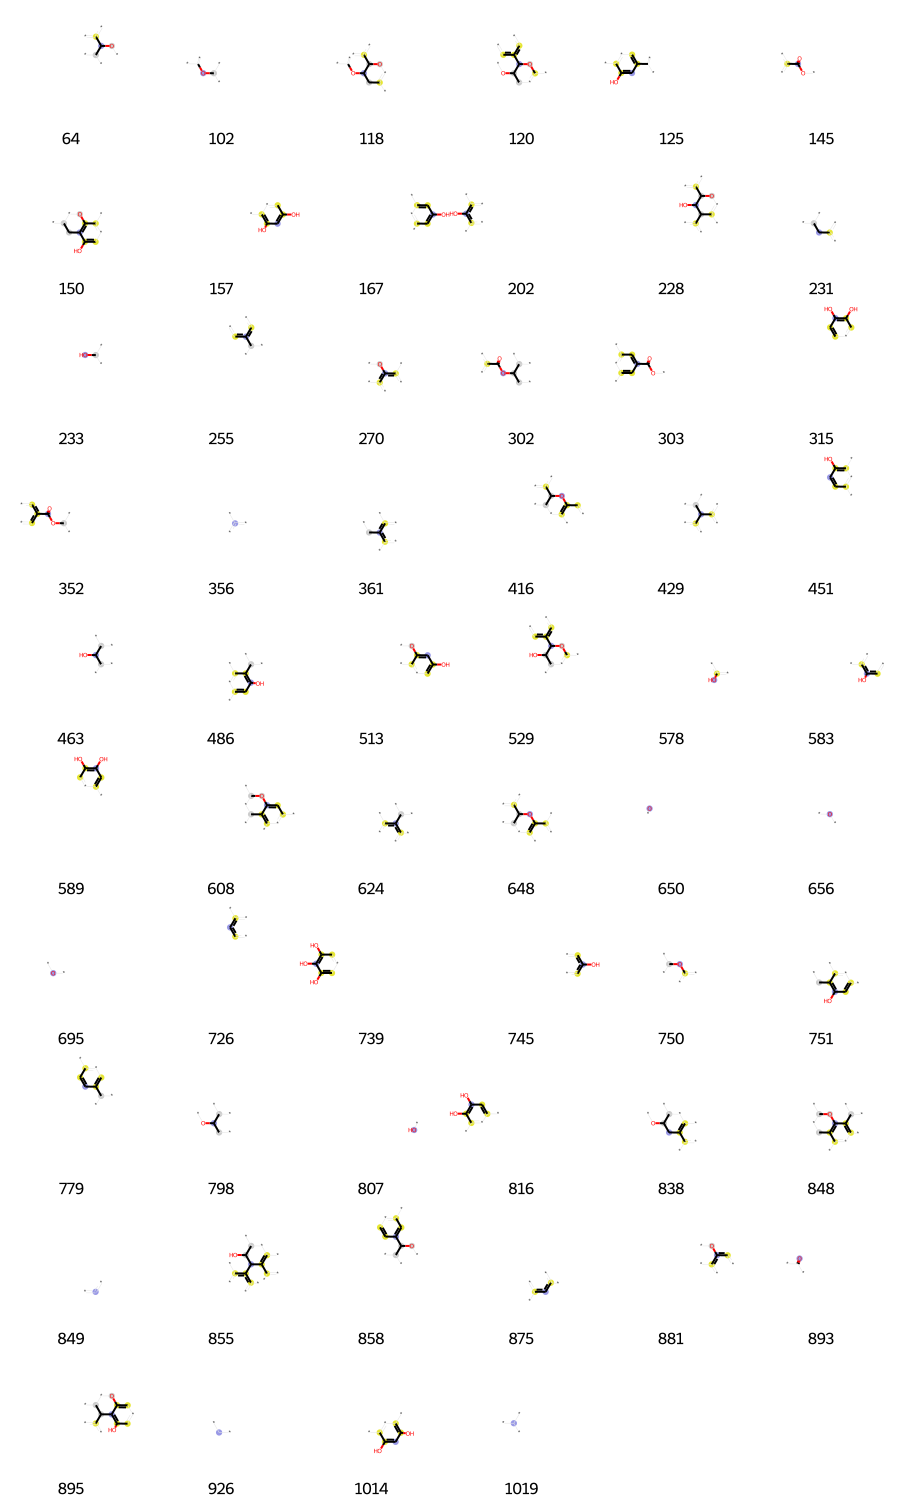

In [114]:
import utils.utils
import importlib
importlib.reload(utils.utils)
from utils.utils import draw_morgan_bits

bits = 'ON'
mol_number = 1

prediction = model.predict(test_dataset)[mol_number]
actual_value = test_dataset.y[mol_number]
print('Prediction: ', prediction)
print('Actual Value: ', actual_value)
smi = test_dataset.mols[mol_number]

draw_morgan_bits(smi, bits)

In [2]:
#Load Dataset
dataset2 = CSVLoader(dataset_path='data/dataset_last_version2.csv', 
                     mols_field='Smiles', 
                     labels_fields='Class')#, shard_size=4000)
dataset2 = dataset2.create_dataset(sep=';')
dataset2.get_shape()

Mols_shape:  2344
Features_shape:  X not defined!
Labels_shape:  (2344,)


In [3]:
from compoundFeaturization.rdkitFingerprints import MorganFingerprint
#Featurization
dataset2 = MorganFingerprint().featurize(dataset2)
dataset2.get_shape()

Featurizing datapoint 0
error in smile: Clc1ccc(cc1)C[N](Cc1ccccc1)(CC(=O)Nc1c(C)cccc1C)C
error in smile: CCCC[N](Cc1ccc(cc1)Cl)(CC(=O)Nc1c(C)cccc1C)C
error in smile: BrCC[N](CC(=O)Nc1c(C)cccc1C)(C)C
error in smile: OC1=Cc2c(O)cc(O)cc2[O]=C1c3ccc(O)cc3
error in smile: CN[C@H](CC(C)C)C(=O)N[C@@H]1[C@H](O)c2ccc(Oc3cc4cc(Oc5ccc(cc5Cl)[C@@H](O)[C@@H]6NC(=O)[C@H](NC(=O)[C@@H]4NC(=O)[C@H](CC(=O)N)NC1=O)c7ccc(O)c(c7)c8c(O)cc(O)cc8[C@H](NC6=O)C(=O)O)c3O[C@@H]9O[C@H](CO)[C@@H](O)[C@H](O)[C@H]9O[C@H]%10C[C@](C)(N)[C@H](O)[C


RDKit ERROR: [11:05:04] Explicit valence for atom # 8 N, 4, is greater than permitted
RDKit ERROR: [11:05:04] Explicit valence for atom # 4 N, 4, is greater than permitted
RDKit ERROR: [11:05:04] Explicit valence for atom # 3 N, 4, is greater than permitted
RDKit ERROR: [11:05:04] Explicit valence for atom # 11 O, 3, is greater than permitted
RDKit ERROR: [11:05:04] SMILES Parse Error: syntax error while parsing: CN[C@H](CC(C)C)C(=O)N[C@@H]1[C@H](O)c2ccc(Oc3cc4cc(Oc5ccc(cc5Cl)[C@@H](O)[C@@H]6NC(=O)[C@H](NC(=O)[C@@H]4NC(=O)[C@H](CC(=O)N)NC1=O)c7ccc(O)c(c7)c8c(O)cc(O)cc8[C@H](NC6=O)C(=O)O)c3O[C@@H]9O[C@H](CO)[C@@H](O)[C@H](O)[C@H]9O[C@H]%10C[C@](C)(N)[C@H](O)[C
RDKit ERROR: [11:05:04] SMILES Parse Error: Failed parsing SMILES 'CN[C@H](CC(C)C)C(=O)N[C@@H]1[C@H](O)c2ccc(Oc3cc4cc(Oc5ccc(cc5Cl)[C@@H](O)[C@@H]6NC(=O)[C@H](NC(=O)[C@@H]4NC(=O)[C@H](CC(=O)N)NC1=O)c7ccc(O)c(c7)c8c(O)cc(O)cc8[C@H](NC6=O)C(=O)O)c3O[C@@H]9O[C@H](CO)[C@@H](O)[C@H](O)[C@H]9O[C@H]%10C[C@](C)(N)[C@H](O)[C' for input: 'C

error in smile: O=C(C[N](CCCc1ccc(cc1)Cl)(C)C)Nc1c(C)cccc1C
error in smile: ClCCCCCCCC[N](CC(=O)Nc1c(C)cccc1C)(C)C
error in smile: ClCCCCCC[N](CC(=O)Nc1c(C)cccc1C)(C)C
error in smile: CC[N](Cc1ccc(cc1)Cl)(CC(=O)Nc1c(C)cccc1C)C
error in smile: O=C(C[N](CCc1ccc(cc1)Cl)(C)C)Nc1c(C)cccc1C
error in smile: O=C(C[N](Cc1ccc(cc1)Cl)(C)C)Nc1c(C)cccc1C
error in smile: ClCCCCCCCCCC[N](CC(=O)Nc1c(C)cccc1C)(C)C
error in smile: ClCCCCC[N](CC(=O)Nc1c(C)cccc1C)(C)C


RDKit ERROR: [11:05:04] Explicit valence for atom # 3 N, 4, is greater than permitted
RDKit ERROR: [11:05:04] Explicit valence for atom # 9 N, 4, is greater than permitted
RDKit ERROR: [11:05:04] Explicit valence for atom # 7 N, 4, is greater than permitted
RDKit ERROR: [11:05:04] Explicit valence for atom # 2 N, 4, is greater than permitted
RDKit ERROR: [11:05:04] Explicit valence for atom # 3 N, 4, is greater than permitted
RDKit ERROR: [11:05:04] Explicit valence for atom # 3 N, 4, is greater than permitted
RDKit ERROR: [11:05:04] Explicit valence for atom # 11 N, 4, is greater than permitted
RDKit ERROR: [11:05:04] Explicit valence for atom # 6 N, 4, is greater than permitted
RDKit ERROR: [11:05:04] Explicit valence for atom # 2 N, 4, is greater than permitted
RDKit ERROR: [11:05:04] Explicit valence for atom # 5 N, 4, is greater than permitted
RDKit ERROR: [11:05:04] Explicit valence for atom # 2 N, 4, is greater than permitted


error in smile: ClC[N](CC(=O)Nc1c(C)cccc1C)(C)C
error in smile: ICCCC[N](CC(=O)Nc1c(C)cccc1C)(C)C
error in smile: CC[N](Cc1ccc(cc1)Cl)(CC(=O)Nc1c(C)cccc1C)CC
error in smile: O1[C@@H](OC2C(O[C@H](OC3C(O[C@@H](OC4CC[C@@]5([C@H](C4)CC[C@H]4[C@@H]5CC(OC(=O)C)[C@@]5(C)[C@@](O)(CC[C@]45O)C(OC(=O)C(CC)C)C)C)CC3OC)C)CC2OC)C)C(O)C(OC)C(O)


RDKit ERROR: [11:05:04] SMILES Parse Error: unclosed ring for input: 'O1[C@@H](OC2C(O[C@H](OC3C(O[C@@H](OC4CC[C@@]5([C@H](C4)CC[C@H]4[C@@H]5CC(OC(=O)C)[C@@]5(C)[C@@](O)(CC[C@]45O)C(OC(=O)C(CC)C)C)C)CC3OC)C)CC2OC)C)C(O)C(OC)C(O)'
RDKit WARNING: [11:05:05] WARNING: not removing hydrogen atom without neighbors


Featurizing datapoint 1000


RDKit ERROR: [11:05:08] Explicit valence for atom # 1 Si, 8, is greater than permitted


error in smile: F[Si-2](F)(F)(F)(F)F.[Na+].[Na+]
Featurizing datapoint 2000


RDKit WARNING: [11:05:12] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [11:05:12] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [11:05:12] WARNING: not removing hydrogen atom without neighbors


Elements with indexes:  [20, 26, 28, 32, 38, 83, 86, 87, 99, 100, 101, 103, 127, 150, 157, 158, 178, 1057]  were removed due to the presence of NAs!
The elements in question are:  ['Clc1ccc(cc1)C[N](Cc1ccccc1)(CC(=O)Nc1c(C)cccc1C)C'
 'CCCC[N](Cc1ccc(cc1)Cl)(CC(=O)Nc1c(C)cccc1C)C'
 'BrCC[N](CC(=O)Nc1c(C)cccc1C)(C)C' 'OC1=Cc2c(O)cc(O)cc2[O]=C1c3ccc(O)cc3'
 'CN[C@H](CC(C)C)C(=O)N[C@@H]1[C@H](O)c2ccc(Oc3cc4cc(Oc5ccc(cc5Cl)[C@@H](O)[C@@H]6NC(=O)[C@H](NC(=O)[C@@H]4NC(=O)[C@H](CC(=O)N)NC1=O)c7ccc(O)c(c7)c8c(O)cc(O)cc8[C@H](NC6=O)C(=O)O)c3O[C@@H]9O[C@H](CO)[C@@H](O)[C@H](O)[C@H]9O[C@H]%10C[C@](C)(N)[C@H](O)[C'
 'O=C(C[N](CCCc1ccc(cc1)Cl)(C)C)Nc1c(C)cccc1C'
 'ClCCCCCCCC[N](CC(=O)Nc1c(C)cccc1C)(C)C'
 'ClCCCCCC[N](CC(=O)Nc1c(C)cccc1C)(C)C'
 'CC[N](Cc1ccc(cc1)Cl)(CC(=O)Nc1c(C)cccc1C)C'
 'O=C(C[N](CCc1ccc(cc1)Cl)(C)C)Nc1c(C)cccc1C'
 'O=C(C[N](Cc1ccc(cc1)Cl)(C)C)Nc1c(C)cccc1C'
 'ClCCCCCCCCCC[N](CC(=O)Nc1c(C)cccc1C)(C)C'
 'ClCCCCC[N](CC(=O)Nc1c(C)cccc1C)(C)C' 'ClC[N](CC(=O)Nc1c(C)cccc1C)(C)C'
 'ICCCC

In [4]:
#Data Split
splitter = SingletaskStratifiedSplitter()
train_dataset2, valid_dataset2, test_dataset2 = splitter.train_valid_test_split(dataset=dataset2, frac_train=0.7,
                                                                                frac_valid=0.15, frac_test=0.15)

In [5]:
test_dataset2.get_shape()

Mols_shape:  232
Features_shape:  (232, 2048)
Labels_shape:  (232,)


In [6]:
#Scikit-Learn Random Forest
rf = RandomForestClassifier()
model = SklearnModel(model=rf)
# model training
model.fit(train_dataset2)

RandomForestClassifier()

In [ ]:
shap_calc = ShapValues(test_dataset2, model)
shap_calc.computePermutationShap()

Permutation explainer:   3%|▎         | 6/232 [02:19<1:32:01, 24.43s/it]

In [ ]:
shap_calc.plotSampleExplanation(index=0, plot_type='waterfall')

In [ ]:
importlib.reload(utils.utils)
from utils.utils import draw_morgan_bit_on_molecule

#Example bit number 52 corresponds to feat_53 (change????)
bit_number = 726
mol_number = 0

prediction = model.predict(test_dataset2)[mol_number]
actual_value = test_dataset2.y[mol_number]
print('Prediction: ', prediction)
print('Actual Value: ', actual_value)
smi = test_dataset2.mols[mol_number]
print(smi)

draw_morgan_bit_on_molecule(smi, bit_number, nBits=1024)

In [11]:
#Load Dataset
dataset3 = CSVLoader(dataset_path='data/dataset_last_version2.csv', 
                     mols_field='Smiles', 
                     labels_fields='Class')#, shard_size=4000)
dataset3 = dataset3.create_dataset(sep=';')
dataset3.get_shape()

Mols_shape:  2344
Features_shape:  X not defined!
Labels_shape:  (2344,)


In [12]:
import compoundFeaturization.rdkitFingerprints
import importlib
importlib.reload(compoundFeaturization.rdkitFingerprints)
from compoundFeaturization.rdkitFingerprints import RDKFingerprint
#Featurization
dataset3 = RDKFingerprint(fpSize=1024).featurize(dataset3)
dataset3.get_shape()

Featurizing datapoint 0
error in smile: Clc1ccc(cc1)C[N](Cc1ccccc1)(CC(=O)Nc1c(C)cccc1C)C
error in smile: CCCC[N](Cc1ccc(cc1)Cl)(CC(=O)Nc1c(C)cccc1C)C
error in smile: BrCC[N](CC(=O)Nc1c(C)cccc1C)(C)C
error in smile: OC1=Cc2c(O)cc(O)cc2[O]=C1c3ccc(O)cc3
error in smile: CN[C@H](CC(C)C)C(=O)N[C@@H]1[C@H](O)c2ccc(Oc3cc4cc(Oc5ccc(cc5Cl)[C@@H](O)[C@@H]6NC(=O)[C@H](NC(=O)[C@@H]4NC(=O)[C@H](CC(=O)N)NC1=O)c7ccc(O)c(c7)c8c(O)cc(O)cc8[C@H](NC6=O)C(=O)O)c3O[C@@H]9O[C@H](CO)[C@@H](O)[C@H](O)[C@H]9O[C@H]%10C[C@](C)(N)[C@H](O)[C


RDKit ERROR: [16:01:50] Explicit valence for atom # 8 N, 4, is greater than permitted
RDKit ERROR: [16:01:51] Explicit valence for atom # 4 N, 4, is greater than permitted
RDKit ERROR: [16:01:51] Explicit valence for atom # 3 N, 4, is greater than permitted
RDKit ERROR: [16:01:51] Explicit valence for atom # 11 O, 3, is greater than permitted
RDKit ERROR: [16:01:51] SMILES Parse Error: syntax error while parsing: CN[C@H](CC(C)C)C(=O)N[C@@H]1[C@H](O)c2ccc(Oc3cc4cc(Oc5ccc(cc5Cl)[C@@H](O)[C@@H]6NC(=O)[C@H](NC(=O)[C@@H]4NC(=O)[C@H](CC(=O)N)NC1=O)c7ccc(O)c(c7)c8c(O)cc(O)cc8[C@H](NC6=O)C(=O)O)c3O[C@@H]9O[C@H](CO)[C@@H](O)[C@H](O)[C@H]9O[C@H]%10C[C@](C)(N)[C@H](O)[C
RDKit ERROR: [16:01:51] SMILES Parse Error: Failed parsing SMILES 'CN[C@H](CC(C)C)C(=O)N[C@@H]1[C@H](O)c2ccc(Oc3cc4cc(Oc5ccc(cc5Cl)[C@@H](O)[C@@H]6NC(=O)[C@H](NC(=O)[C@@H]4NC(=O)[C@H](CC(=O)N)NC1=O)c7ccc(O)c(c7)c8c(O)cc(O)cc8[C@H](NC6=O)C(=O)O)c3O[C@@H]9O[C@H](CO)[C@@H](O)[C@H](O)[C@H]9O[C@H]%10C[C@](C)(N)[C@H](O)[C' for input: 'C

error in smile: O=C(C[N](CCCc1ccc(cc1)Cl)(C)C)Nc1c(C)cccc1C
error in smile: ClCCCCCCCC[N](CC(=O)Nc1c(C)cccc1C)(C)C
error in smile: ClCCCCCC[N](CC(=O)Nc1c(C)cccc1C)(C)C
error in smile: CC[N](Cc1ccc(cc1)Cl)(CC(=O)Nc1c(C)cccc1C)C
error in smile: O=C(C[N](CCc1ccc(cc1)Cl)(C)C)Nc1c(C)cccc1C
error in smile: O=C(C[N](Cc1ccc(cc1)Cl)(C)C)Nc1c(C)cccc1C
error in smile: ClCCCCCCCCCC[N](CC(=O)Nc1c(C)cccc1C)(C)C
error in smile: ClCCCCC[N](CC(=O)Nc1c(C)cccc1C)(C)C
error in smile: ClC[N](CC(=O)Nc1c(C)cccc1C)(C)C
error in smile: ICCCC[N](CC(=O)Nc1c(C)cccc1C)(C)C
error in smile: CC[N](Cc1ccc(cc1)Cl)(CC(=O)Nc1c(C)cccc1C)CC


RDKit ERROR: [16:01:51] Explicit valence for atom # 3 N, 4, is greater than permitted
RDKit ERROR: [16:01:51] Explicit valence for atom # 3 N, 4, is greater than permitted
RDKit ERROR: [16:01:51] Explicit valence for atom # 11 N, 4, is greater than permitted
RDKit ERROR: [16:01:51] Explicit valence for atom # 6 N, 4, is greater than permitted
RDKit ERROR: [16:01:51] Explicit valence for atom # 2 N, 4, is greater than permitted
RDKit ERROR: [16:01:51] Explicit valence for atom # 5 N, 4, is greater than permitted
RDKit ERROR: [16:01:51] Explicit valence for atom # 2 N, 4, is greater than permitted
RDKit ERROR: [16:01:51] SMILES Parse Error: unclosed ring for input: 'O1[C@@H](OC2C(O[C@H](OC3C(O[C@@H](OC4CC[C@@]5([C@H](C4)CC[C@H]4[C@@H]5CC(OC(=O)C)[C@@]5(C)[C@@](O)(CC[C@]45O)C(OC(=O)C(CC)C)C)C)CC3OC)C)CC2OC)C)C(O)C(OC)C(O)'


error in smile: O1[C@@H](OC2C(O[C@H](OC3C(O[C@@H](OC4CC[C@@]5([C@H](C4)CC[C@H]4[C@@H]5CC(OC(=O)C)[C@@]5(C)[C@@](O)(CC[C@]45O)C(OC(=O)C(CC)C)C)C)CC3OC)C)CC2OC)C)C(O)C(OC)C(O)


RDKit WARNING: [16:01:52] WARNING: not removing hydrogen atom without neighbors


Featurizing datapoint 1000
error in smile: F[Si-2](F)(F)(F)(F)F.[Na+].[Na+]


RDKit ERROR: [16:01:53] Explicit valence for atom # 1 Si, 8, is greater than permitted


Featurizing datapoint 2000


RDKit WARNING: [16:01:56] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [16:01:57] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [16:01:57] WARNING: not removing hydrogen atom without neighbors


Elements with indexes:  [20, 26, 28, 32, 38, 83, 86, 87, 99, 100, 101, 103, 127, 150, 157, 158, 178, 1057]  were removed due to the presence of NAs!
The elements in question are:  ['Clc1ccc(cc1)C[N](Cc1ccccc1)(CC(=O)Nc1c(C)cccc1C)C'
 'CCCC[N](Cc1ccc(cc1)Cl)(CC(=O)Nc1c(C)cccc1C)C'
 'BrCC[N](CC(=O)Nc1c(C)cccc1C)(C)C' 'OC1=Cc2c(O)cc(O)cc2[O]=C1c3ccc(O)cc3'
 'CN[C@H](CC(C)C)C(=O)N[C@@H]1[C@H](O)c2ccc(Oc3cc4cc(Oc5ccc(cc5Cl)[C@@H](O)[C@@H]6NC(=O)[C@H](NC(=O)[C@@H]4NC(=O)[C@H](CC(=O)N)NC1=O)c7ccc(O)c(c7)c8c(O)cc(O)cc8[C@H](NC6=O)C(=O)O)c3O[C@@H]9O[C@H](CO)[C@@H](O)[C@H](O)[C@H]9O[C@H]%10C[C@](C)(N)[C@H](O)[C'
 'O=C(C[N](CCCc1ccc(cc1)Cl)(C)C)Nc1c(C)cccc1C'
 'ClCCCCCCCC[N](CC(=O)Nc1c(C)cccc1C)(C)C'
 'ClCCCCCC[N](CC(=O)Nc1c(C)cccc1C)(C)C'
 'CC[N](Cc1ccc(cc1)Cl)(CC(=O)Nc1c(C)cccc1C)C'
 'O=C(C[N](CCc1ccc(cc1)Cl)(C)C)Nc1c(C)cccc1C'
 'O=C(C[N](Cc1ccc(cc1)Cl)(C)C)Nc1c(C)cccc1C'
 'ClCCCCCCCCCC[N](CC(=O)Nc1c(C)cccc1C)(C)C'
 'ClCCCCC[N](CC(=O)Nc1c(C)cccc1C)(C)C' 'ClC[N](CC(=O)Nc1c(C)cccc1C)(C)C'
 'ICCCC

In [13]:
#Data Split
splitter = SingletaskStratifiedSplitter()
train_dataset3, valid_dataset3, test_dataset3 = splitter.train_valid_test_split(dataset=dataset3, frac_train=0.7,
                                                                                frac_valid=0.15, frac_test=0.15)

In [14]:
test_dataset3.get_shape()

Mols_shape:  232
Features_shape:  (232, 1024)
Labels_shape:  (232,)


In [15]:
#Scikit-Learn Random Forest
rf = RandomForestClassifier()
model = SklearnModel(model=rf)
# model training
model.fit(train_dataset3)

RandomForestClassifier()


Permutation explainer:  47%|████▋     | 110/232 [28:06<30:50, 15.17s/it]


Permutation explainer:  94%|█████████▎| 217/232 [54:56<03:41, 14.74s/it]


Permutation explainer: 100%|██████████| 232/232 [58:37<00:00, 14.73s/it]
Permutation explainer: 233it [58:52, 15.23s/it]                         


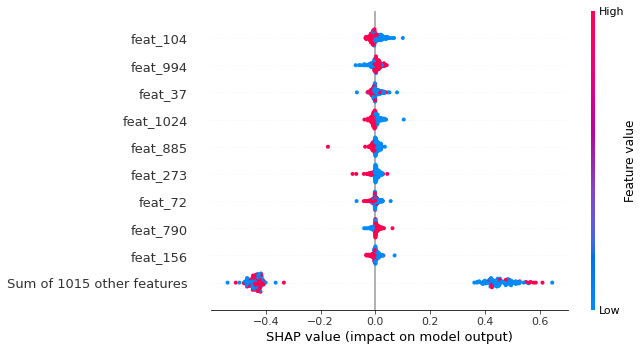

In [16]:
shap_calc = ShapValues(test_dataset3, model)
shap_calc.computePermutationShap()

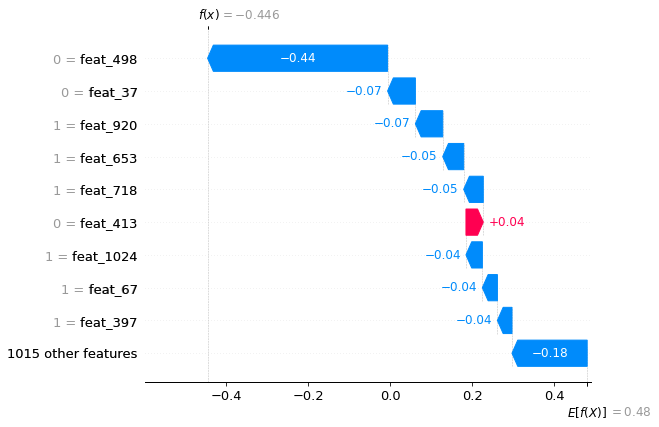

In [54]:
shap_calc.plotSampleExplanation(index=10, plot_type='waterfall')

Prediction:  [0.52 0.48]
Actual Value:  0
CCC(=O)OC(C)(C)C1CCC(=CC1)C


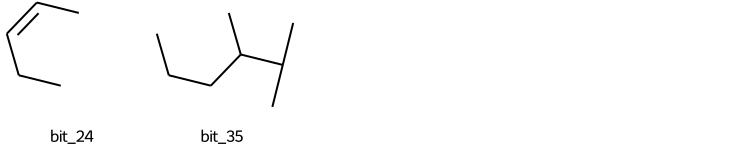

In [92]:
import utils.utils
importlib.reload(utils.utils)
from utils.utils import draw_rdk_bit_on_molecule, draw_rdk_bits
from rdkit.Chem.Draw import IPythonConsole
#Example bit number 52 corresponds to feat_53 (change????)
bit_number = 1000
mol_number = 10

prediction = model.predict(test_dataset3)[mol_number]
actual_value = test_dataset3.y[mol_number]
print('Prediction: ', prediction)
print('Actual Value: ', actual_value)
smi = test_dataset3.mols[mol_number]
print(smi)

#for some molecules returns error because cannot kekulize
draw_rdk_bits(smi, [24, 35])

#draw_rdk_bit_on_molecule(smi, bit_number, fpSize=1024)